In [15]:
!pip install openpyxl

In [16]:
import numpy as np
import pandas as pd

In [17]:
df1 = pd.read_excel(r"C:\Users\madha\Downloads\ProductA.xlsx")
df2 = pd.read_excel(r"C:\Users\madha\Downloads\ProductA_google_clicks.xlsx")
df3 = pd.read_excel(r"C:\Users\madha\Downloads\ProductA_fb_impressions.xlsx")

In [18]:
df1

,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33
...,...,...
207,2022-06-26,13
208,2022-06-27,16
209,2022-06-28,13
210,2022-06-29,16


In [19]:
df2

,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451
...,...,...
207,2022-06-26,114
208,2022-06-27,106
209,2022-06-28,109
210,2022-06-29,60


In [20]:
df3

,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678
...,...,...
207,2022-06-26,1218
208,2022-06-27,1311
209,2022-06-28,885
210,2022-06-29,1000


In [21]:
# Merge datasets on 'Day Index'
merged_data = pd.merge(df1, df2, on='Day Index', how='inner')
merged_data = pd.merge(merged_data, df3, on='Day Index', how='inner')

# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()
merged_data_head


,Day Index,Quantity,Clicks,Impressions
0,2021-12-01,14,445,620
1,2021-12-02,10,433,890
2,2021-12-03,13,424,851
3,2021-12-04,22,427,881
4,2021-12-05,33,451,678


Augmented Dickey-Fuller Test for Quantity
ADF Test Statistic              -4.445717
p-value                          0.000246
# Lags Used                      3.000000
Number of Observations Used    208.000000
Critical Value (1%)             -3.462186
Critical Value (5%)             -2.875538
Critical Value (10%)            -2.574231
dtype: float64
Augmented Dickey-Fuller Test for Clicks
ADF Test Statistic              -0.870572
p-value                          0.797509
# Lags Used                      2.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64
Augmented Dickey-Fuller Test for Impressions
ADF Test Statistic            -5.696206e+00
p-value                        7.863580e-07
# Lags Used                    0.000000e+00
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.87

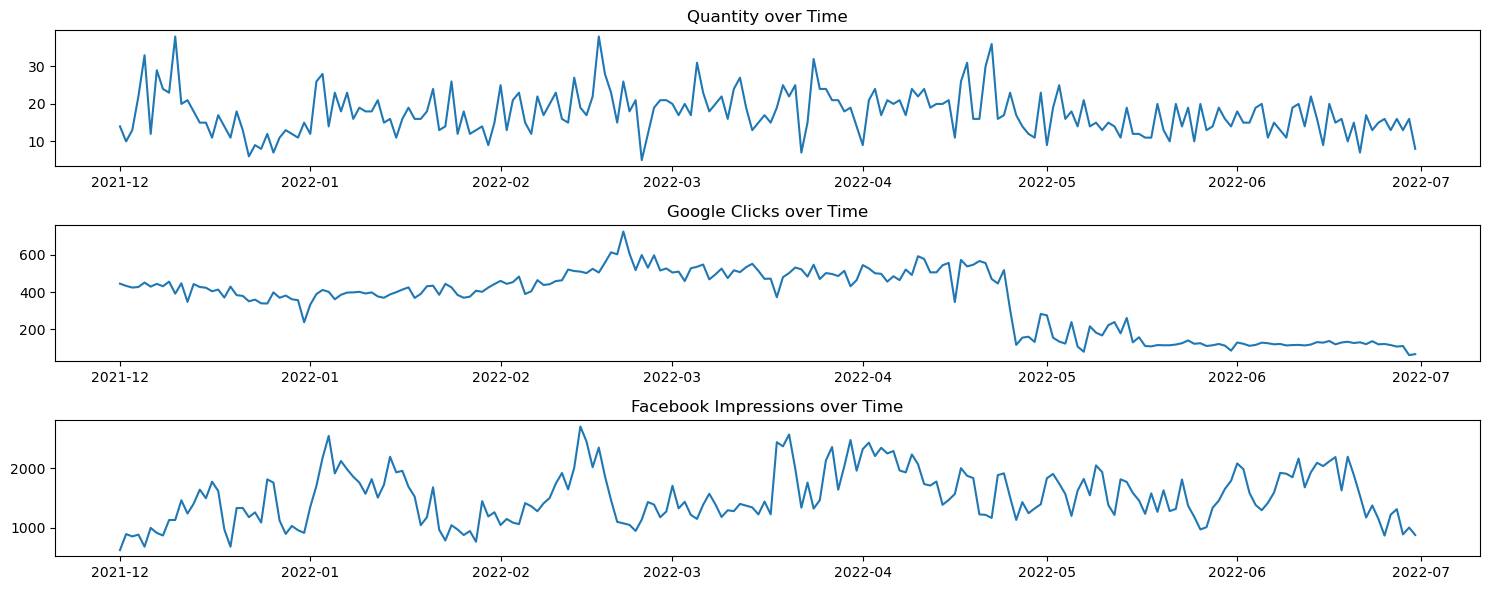

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out['Critical Value (%s)' % key] = value
    print(f'Augmented Dickey-Fuller Test for {title}')
    print(out)
    return out

# Perform ADF test on Quantity, Clicks, and Impressions
adf_quantity = adf_test(merged_data['Quantity'], 'Quantity')
adf_clicks = adf_test(merged_data['Clicks'], 'Clicks')
adf_impressions = adf_test(merged_data['Impressions'], 'Impressions')

# Plot the time series data
plt.figure(figsize=(15, 6))

plt.subplot(3, 1, 1)
plt.plot(merged_data['Day Index'], merged_data['Quantity'])
plt.title('Quantity over Time')

plt.subplot(3, 1, 2)
plt.plot(merged_data['Day Index'], merged_data['Clicks'])
plt.title('Google Clicks over Time')

plt.subplot(3, 1, 3)
plt.plot(merged_data['Day Index'], merged_data['Impressions'])
plt.title('Facebook Impressions over Time')

plt.tight_layout()
plt.show()


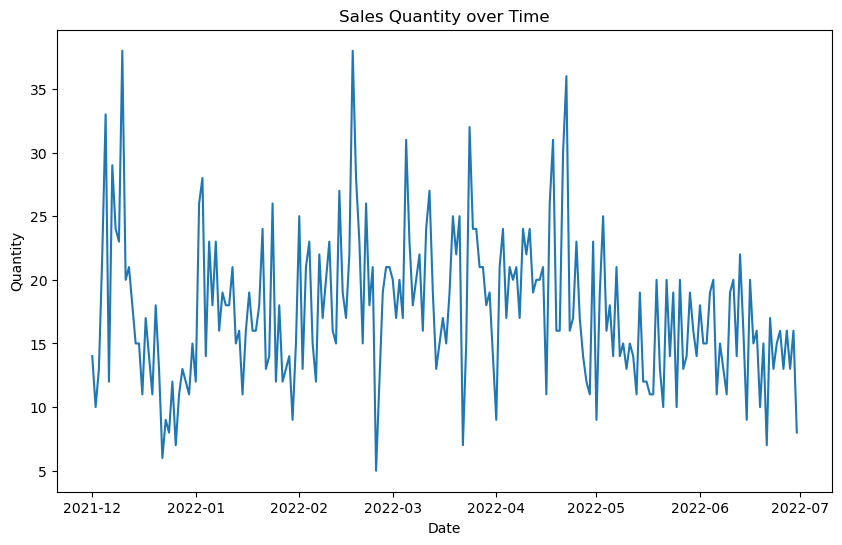

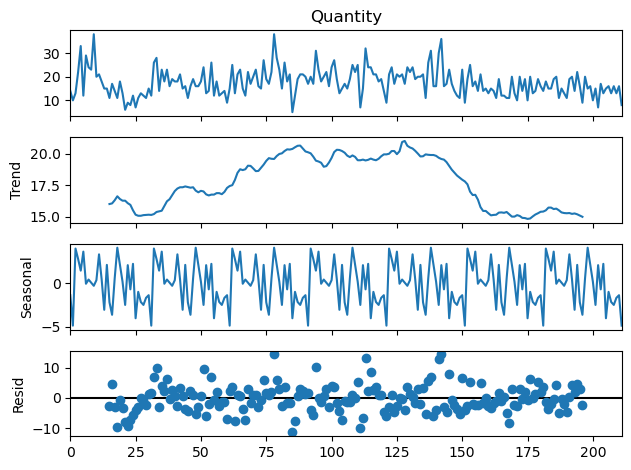

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot sales data over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Day Index'], merged_data['Quantity'])
plt.title('Sales Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(merged_data['Quantity'], model='additive', period=30)
decomposition.plot()
plt.show()


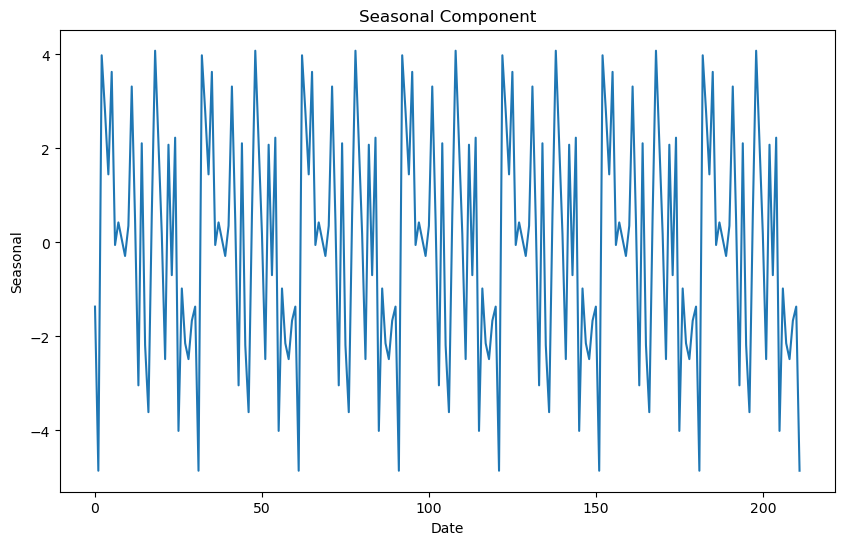

In [24]:
# Decomposition already done in the previous step
# Seasonal component visualization
plt.figure(figsize=(10, 6))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.show()


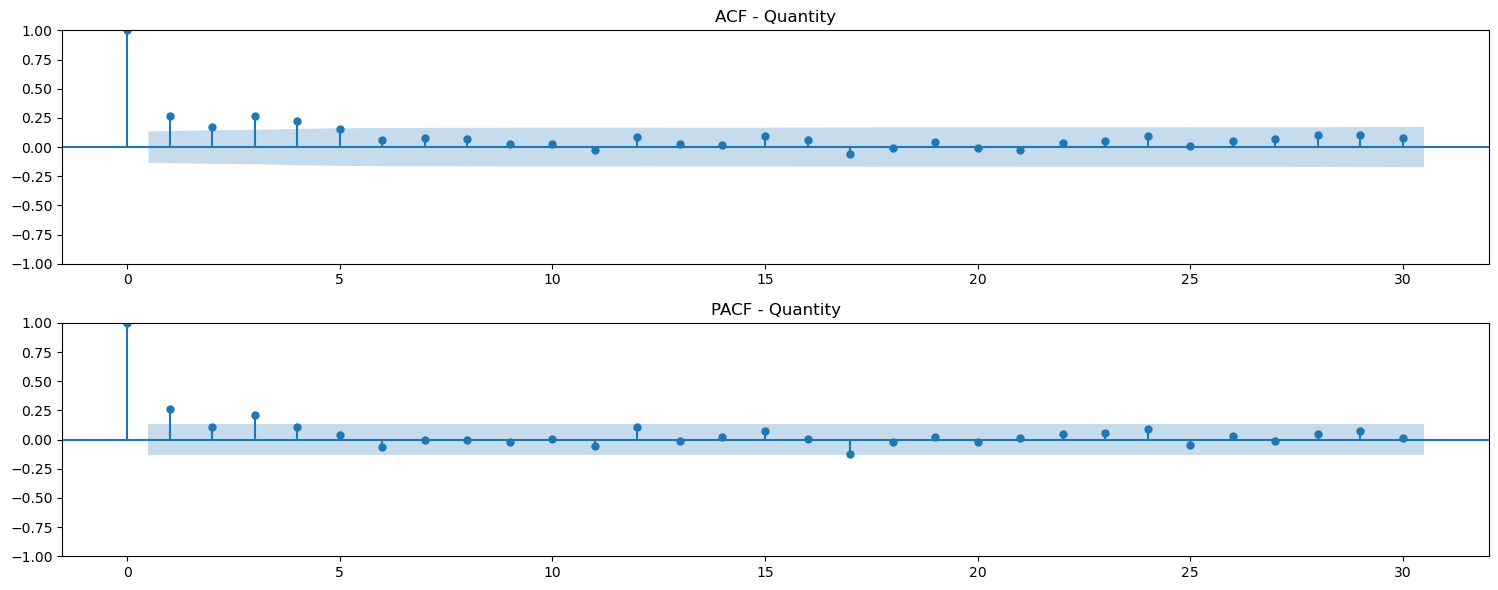

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plot_acf(merged_data['Quantity'], lags=30, ax=plt.gca())
plt.title('ACF - Quantity')

plt.subplot(2, 1, 2)
plot_pacf(merged_data['Quantity'], lags=30, ax=plt.gca())
plt.title('PACF - Quantity')

plt.tight_layout()
plt.show()


Correlation between Google Clicks and Sales Quantity: 0.37604112043743887


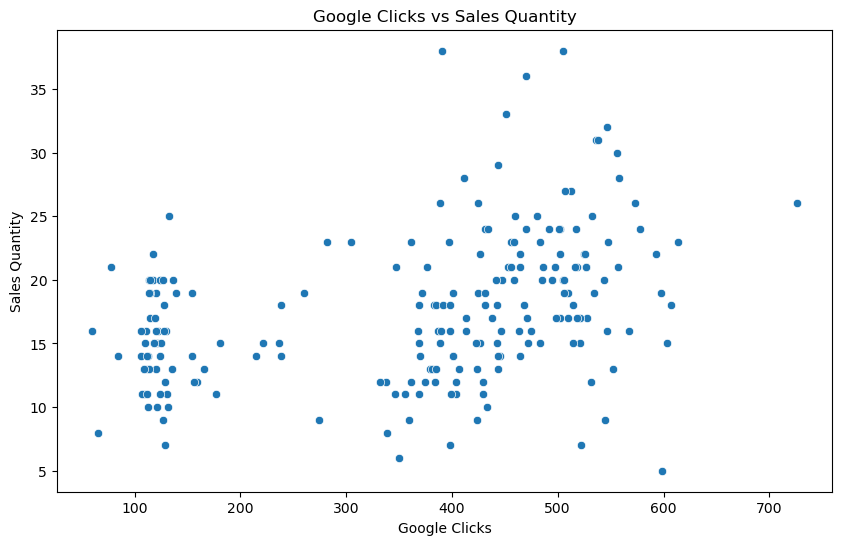

In [26]:
# Correlation analysis
import seaborn as sns
corr_clicks_sales = merged_data['Clicks'].corr(merged_data['Quantity'])
print(f'Correlation between Google Clicks and Sales Quantity: {corr_clicks_sales}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Clicks', y='Quantity')
plt.title('Google Clicks vs Sales Quantity')
plt.xlabel('Google Clicks')
plt.ylabel('Sales Quantity')
plt.show()


Correlation between Facebook Impressions and Sales Quantity: 0.1359426271127098


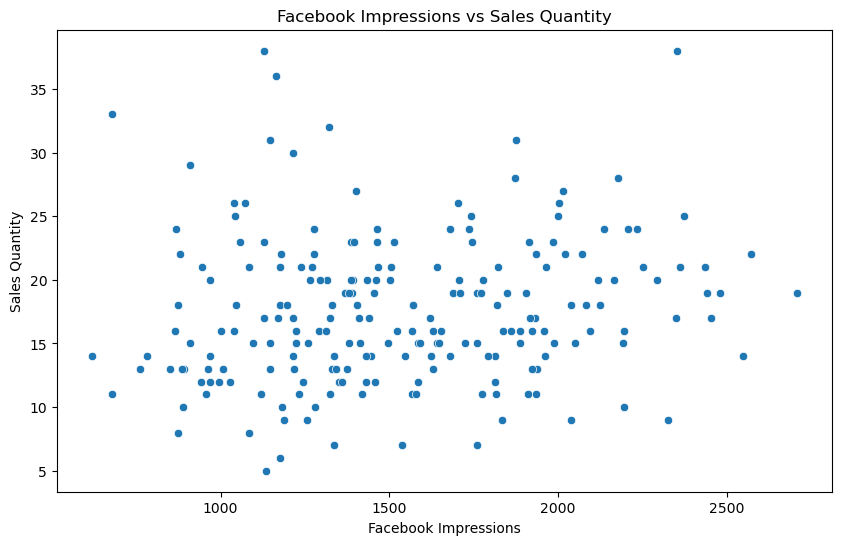

In [27]:
# Correlation analysis
corr_impressions_sales = merged_data['Impressions'].corr(merged_data['Quantity'])
print(f'Correlation between Facebook Impressions and Sales Quantity: {corr_impressions_sales}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Impressions', y='Quantity')
plt.title('Facebook Impressions vs Sales Quantity')
plt.xlabel('Facebook Impressions')
plt.ylabel('Sales Quantity')
plt.show()


In [28]:
# Create lagged features
merged_data['Quantity_Lag1'] = merged_data['Quantity'].shift(1)
merged_data['Clicks_Lag1'] = merged_data['Clicks'].shift(1)
merged_data['Impressions_Lag1'] = merged_data['Impressions'].shift(1)

# Drop NaN values due to lagging
lagged_data = merged_data.dropna()

# Test significance using regression
import statsmodels.api as sm

# Define the target and predictors
X = lagged_data[['Quantity_Lag1', 'Clicks_Lag1', 'Impressions_Lag1']]
y = lagged_data['Quantity']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     13.36
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           5.27e-08
Time:                        20:07:58   Log-Likelihood:                -651.10
No. Observations:                 211   AIC:                             1310.
Df Residuals:                     207   BIC:                             1324.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.9672      1.717  